In [1]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
from cvxopt import solvers
from scipy.spatial.distance import cdist
import cvxopt.base
from pylab import *
import io
%matplotlib inline

In [2]:
filename1 = "iris.data.txt"
r = io.open(filename1, encoding='utf8').readlines()
X = []
Y = []
for i in r[0:150]:
    x = i.split(',')
    X.append(map(float,x[0:len(x)-1]))
    if x[-1] == "Iris-setosa\n":
        Y.append(0)
    elif x[-1] == 'Iris-versicolor\n':
        Y.append(1)
    elif x[-1] == 'Iris-virginica\n':
        Y.append(2)
X = np.array(X)
Y = np.array(Y)

In [3]:
filename2 = "data_banknote_authentication.txt"
r = io.open(filename2, encoding='utf8').readlines()
X1 = []
Y1 = []
for i in r:
    x1 = i.split(',')
    for j in range(0,len(x1)-1):
        try:
            x1[j] = float(x1[j])
        except ValueError:
            x1[j] = 0.0
    X1.append(map(float,x1[0:len(x1)-1]))
    Y1.append(float(x1[-1]))
X1 = np.array(X1)
Y1 = np.array(Y1)

In [4]:
def hard(x,y):
    m = len(x)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * np.dot(x,x.T)))
    #print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = np.reshape((y), (1,m))
    print a
    #a = np.ndarray.tolist(y)
    a = a.astype(double)
    print type(a)
    print a
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1
    

In [5]:
def hard(x,y):
    m = len(x)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * np.dot(x,x.T)))
    #print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = np.reshape((y), (1,m))
    print a
    #a = np.ndarray.tolist(y)
    a = a.astype(double)
    print type(a)
    print a
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1

In [6]:
def hardGauss(x,y):
    sigma = 0.1
    eud = cdist(x,x,'sqeuclidean')
    ker = np.exp((-1/2)*(eud/sigma**2))
    m = len(x)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * ker))
    #print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = np.reshape((y), (1,m))
    #print a
    #a = np.ndarray.tolist(y)
    a = a.astype(double)
    #print type(a)
    #print a
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1

In [7]:
def hardPoly(x,y):
    poly_kernal = []
    for a in range(len(x)):
        list1 = []
        for b in range(len(x)):
            list1.append((np.dot(x[a],x[b])+1)**1)
        poly_kernal.append(list1)
    poly_kernal = np.array(poly_kernal)
    m = len(x)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * poly_kernal))
    #print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = np.reshape((y), (1,m))
    #print a
    #a = np.ndarray.tolist(y)
    a = a.astype(double)
    #print type(a)
    #print a
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1

In [8]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 < 0:
            predict.append([1])
        else:
            predict.append([-1])
    return np.array(predict)

In [9]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [10]:
W_iris_gauss, W0_iris_gauss, SupportVectorIrisGauss = hardGauss(X,Y)

     pcost       dcost       gap    pres   dres
 0: -1.7996e-01 -9.8766e-01  8e-01  1e-16  1e+00
 1: -1.7997e-01 -1.8866e-01  9e-03  1e-17  1e-02
 2: -1.7997e-01 -1.8005e-01  9e-05  2e-16  1e-04
 3: -1.7997e-01 -1.7997e-01  9e-07  1e-16  1e-06
 4: -1.7997e-01 -1.7997e-01  9e-09  1e-17  1e-08
Optimal solution found.
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6

In [11]:
W_iris_poly, W0_iris_poly, SupportVectorIrisPoly = hardPoly(X,Y)

     pcost       dcost       gap    pres   dres
 0: -1.9809e-03  1.3704e-01  2e+02  1e+01  1e+00
 1:  4.2310e-04  3.9891e-01  1e+01  1e+00  8e-02
 2:  1.6308e-02  3.2701e+00  5e+00  4e-01  3e-02
 3:  4.3646e-02  7.9497e+00  4e+00  3e-01  2e-02
 4:  1.4879e-01  1.4543e+01  5e+00  3e-01  2e-02
 5:  1.6221e+00  4.7232e+01  7e+00  2e-01  2e-02
 6:  1.7633e+01  1.4418e+02  3e+01  2e-01  2e-02
 7:  2.9947e+01  1.8689e+02  4e+01  2e-01  1e-02
 8:  3.1373e+01  1.9068e+02  4e+01  2e-01  1e-02
 9:  6.0518e+01  2.5143e+02  6e+01  2e-01  1e-02
10:  8.6411e+01  2.9299e+02  7e+01  1e-01  1e-02
11:  1.6467e+02  3.8368e+02  8e+01  1e-01  8e-03
12:  1.6308e+02  3.8896e+02  8e+01  1e-01  8e-03
13:  1.9182e+02  4.5933e+02  9e+01  9e-02  7e-03
14:  2.5187e+02  7.8935e+02  1e+02  6e-02  5e-03
15:  1.7523e+03  1.6948e+03  7e+02  1e-02  1e-03
16:  1.7046e+03  1.6995e+03  8e+00  7e-05  6e-06
17:  1.6996e+03  1.6995e+03  8e-02  7e-07  6e-08
18:  1.6995e+03  1.6995e+03  8e-04  7e-09  6e-10
Optimal solution foun

In [13]:
predict_iris_gauss = predict(X, W_iris_gauss,  W0_iris_gauss)

In [14]:
predict_iris_poly = predict(X, W_iris_poly,  W0_iris_poly)

In [15]:
acc = accuracy(Y,predict_iris_gauss)
print "Accuracy(Gauss):", acc

Accuracy(Gauss): 0.08


In [16]:
acc1 = accuracy(Y,predict_iris_poly)
print "Accuracy (Poly):", acc1

Accuracy (Poly): 0.333333333333


In [17]:
W_bank_gauss, W0_bank_gauss, SupportVectorBankGauss = hardGauss(X1,Y1)

     pcost       dcost       gap    pres   dres
 0: -1.0820e+00 -3.2681e+00  2e+00  7e-16  1e+00
 1: -1.0820e+00 -1.1043e+00  2e-02  6e-16  1e-02
 2: -1.0820e+00 -1.0822e+00  2e-04  2e-16  1e-04
 3: -1.0820e+00 -1.0820e+00  3e-06  1e-17  1e-06
 4: -1.0820e+00 -1.0820e+00  4e-07  4e-16  2e-07
 5: -1.0820e+00 -1.0820e+00  2e-08  1e-15  1e-16
Optimal solution found.
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ..., 
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [18]:
W_bank_poly, W0_bank_poly, SupportVectorBankPoly = hardPoly(X1,Y1)

     pcost       dcost       gap    pres   dres
 0: -8.1941e-04  1.9278e-02  1e+03  4e+01  1e+00
 1:  6.2921e-05  6.1034e-02  3e+01  9e-01  2e-02
 2:  4.7258e-03  1.8123e+00  9e+00  3e-01  7e-03
 3:  2.3517e-02  4.6558e+00  8e+00  2e-01  5e-03
 4:  4.8109e-02  6.7410e+00  8e+00  2e-01  5e-03
 5:  1.4079e-01  1.1491e+01  8e+00  1e-01  4e-03
 6:  7.3173e-01  2.5830e+01  7e+00  1e-01  3e-03
 7:  6.0911e+00  7.0613e+01  1e+01  8e-02  2e-03
 8:  3.1018e+01  1.4215e+02  4e+01  7e-02  2e-03
 9:  3.4477e+01  1.4816e+02  4e+01  7e-02  2e-03
10:  7.5880e+01  1.9517e+02  5e+01  5e-02  1e-03
11:  8.3213e+01  2.0407e+02  5e+01  5e-02  1e-03
12:  8.6099e+01  2.0575e+02  5e+01  5e-02  1e-03
13:  1.4767e+02  2.3498e+02  5e+01  3e-02  7e-04
14:  1.5495e+02  2.3781e+02  5e+01  3e-02  7e-04
15:  1.8845e+02  2.4806e+02  4e+01  2e-02  5e-04
16:  2.0026e+02  2.5941e+02  4e+01  1e-02  4e-04
17:  2.3826e+02  2.9108e+02  3e+01  8e-03  2e-04
18:  2.4901e+02  2.9237e+02  3e+01  7e-03  2e-04
19:  2.7900e+02  2.99

In [19]:
predict_bank_gauss = predict(X1, W_bank_gauss,  W0_bank_gauss)

In [20]:
predict_bank_poly = predict(X1, W_bank_poly,  W0_bank_poly)

In [21]:
acc_bank_gauss = accuracy(Y1,predict_bank_gauss)
print "Accuracy:(gauss)", acc_bank_gauss

Accuracy:(gauss) 0.1472303207


In [22]:
acc_bank_poly = accuracy(Y1,predict_bank_poly)
print "Accuracy(poly):", acc_bank_poly

Accuracy(poly): 0.1472303207


In [23]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []
   
    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
        
    plt.plot(X,'ro')
    plt.plot(Y,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

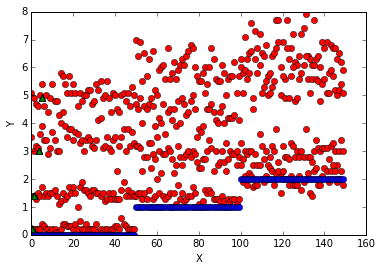

In [24]:
SVplot = plotsupportvector(SupportVectorIrisGauss,X,Y)

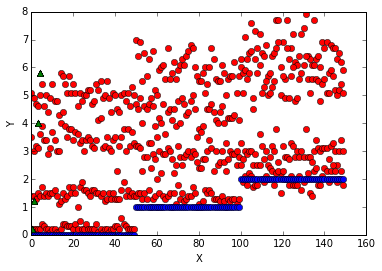

In [25]:
SVplot1 = plotsupportvector(SupportVectorIrisPoly,X,Y)

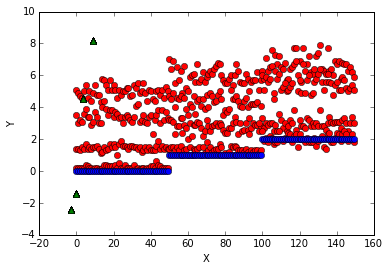

In [26]:
SVplot2 = plotsupportvector(SupportVectorBankGauss,X1,Y1)

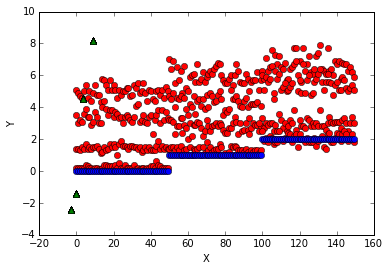

In [27]:
SVplot3 = plotsupportvector(SupportVectorBankPoly,X1,Y1)